# LinearRegression

### 목표
- AirQuality 데이터를 대상으로 모델링을 해서, 오존 농도를 예측하기

### 목차
0. 라이브러리 및 데이터 준비하기
    1. 라이브러리 불러오기
    2. 데이터 불러오기
1. 데이터 이해하기
    1. 데이터 정보 확인
    2. 데이터 분포 확인
    3. 데이터 기술통계 확인
    4. 데이터 상관관계 확인
    5. 데이터의 시각화로 확인
2. 데이터 준비하기
    1. 결측치 처리
    2. 변수 제가
    3. x, y 분리
    4. 학습용, 평가용 데이터 분리
3. 모델링
    1. 불러오기
    2. 선언하기
    3. 학습하기
    4. 예측하기
    5. 평가하기

# 0. 라이브러리 및 데이터 준비하기

기본 라이브러리와 데이터를 불러온다.

In [53]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore') # 경고 무시
%config InlineBackend.figure_format = 'retina' # 시각화 이미지 고해상도 출력하기

In [54]:
# 데이터 읽어오기
path = '../data/airquilty.csv'
data = pd.read_csv(path)

In [55]:
data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41,190.0,7.4,67,5,1
1,36,118.0,8.0,72,5,2
2,12,149.0,12.6,74,5,3
3,18,313.0,11.5,62,5,4
4,19,NaN,14.3,56,5,5


# 1.데이터 이해하기

데이터를 충분히 이해할 수 있도록 다양한 탐색 과정 수행한다.

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    153 non-null    int64  
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 7.3 KB


- Solar.R 컬럼의 경우 결측치가 있다.
    - 결측치 처리가 필요하겠다.(만약 Solar.R를 사용한다면)

#### 각 데이터별, 기술통계를 확인해보자
```
data.describe().t
```

In [57]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Ozone,153.0,42.052288,30.156127,1.0,20.00,34.0,59.00,168.0
Solar.R,146.0,185.931507,90.058422,7.0,115.75,205.0,258.75,334.0
Wind,153.0,9.957516,3.523001,1.7,7.40,9.7,11.50,20.7
Temp,153.0,77.882353,9.465270,56.0,72.00,79.0,85.00,97.0
Month,153.0,6.993464,1.416522,5.0,6.00,7.0,8.00,9.0
Day,153.0,15.803922,8.864520,1.0,8.00,16.0,23.00,31.0


#### 데이터 분포를 확인해보자.
```
plt.hist()
```

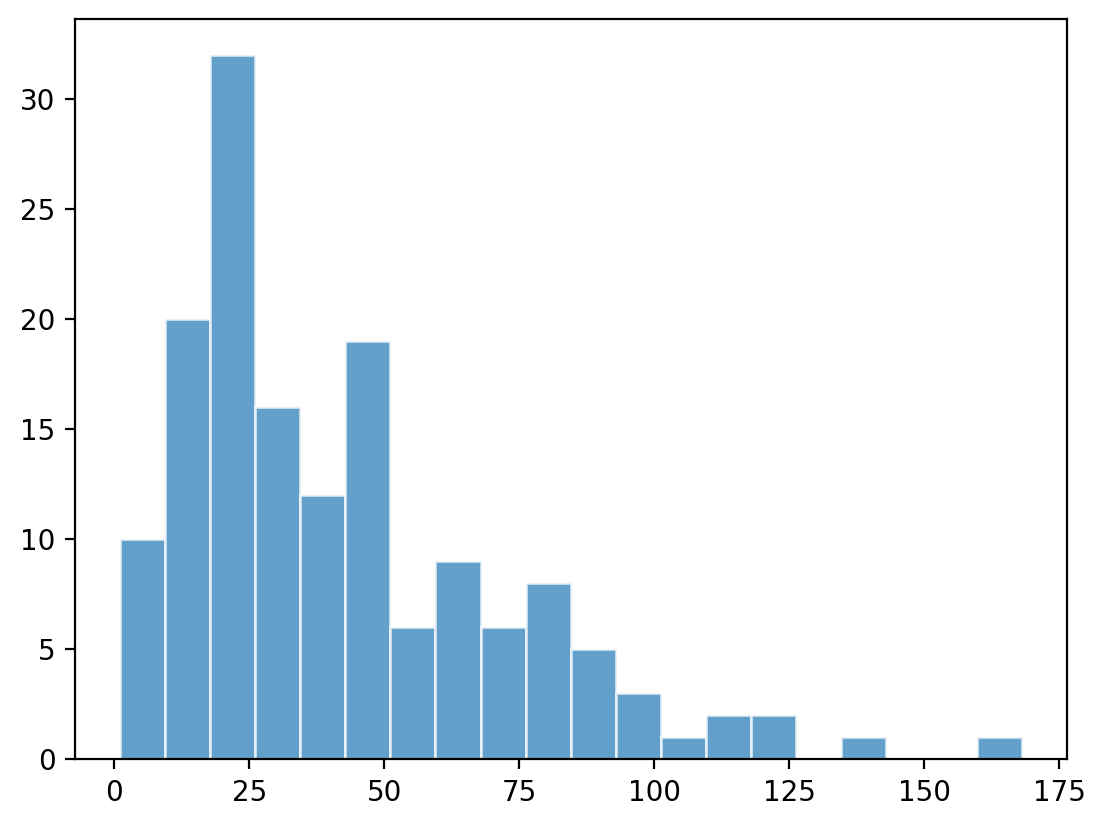

In [58]:
plt.hist(data['Ozone'], bins=20, alpha=0.7, ec='w')
plt.show()

#### 각 데이터별, 상관관계 확인 및 시각화 해보자
```
# 상관관계 확인
data.corr()

# 시각화
sns.heatmap(data.corr(),
           annot = True,
           cmap = 'Blues',
           fmt='.2f')
plt.show()

- annot : 글자 표시
- cmap : 색상표
- fmt : 포맷형식(숫자 얼만큼 나오게 할지)
- square : 정사각형 만들지 말지
- annot_kws : 키워드별 수정사항
```

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.280068,-0.605478,0.683372,0.174197,0.004419
Solar.R,0.280068,1.000000,-0.056792,0.275840,-0.075301,-0.150275
Wind,-0.605478,-0.056792,1.000000,-0.457988,-0.178293,0.027181
Temp,0.683372,0.275840,-0.457988,1.000000,0.420947,-0.130593
Month,0.174197,-0.075301,-0.178293,0.420947,1.000000,-0.007962
Day,0.004419,-0.150275,0.027181,-0.130593,-0.007962,1.000000


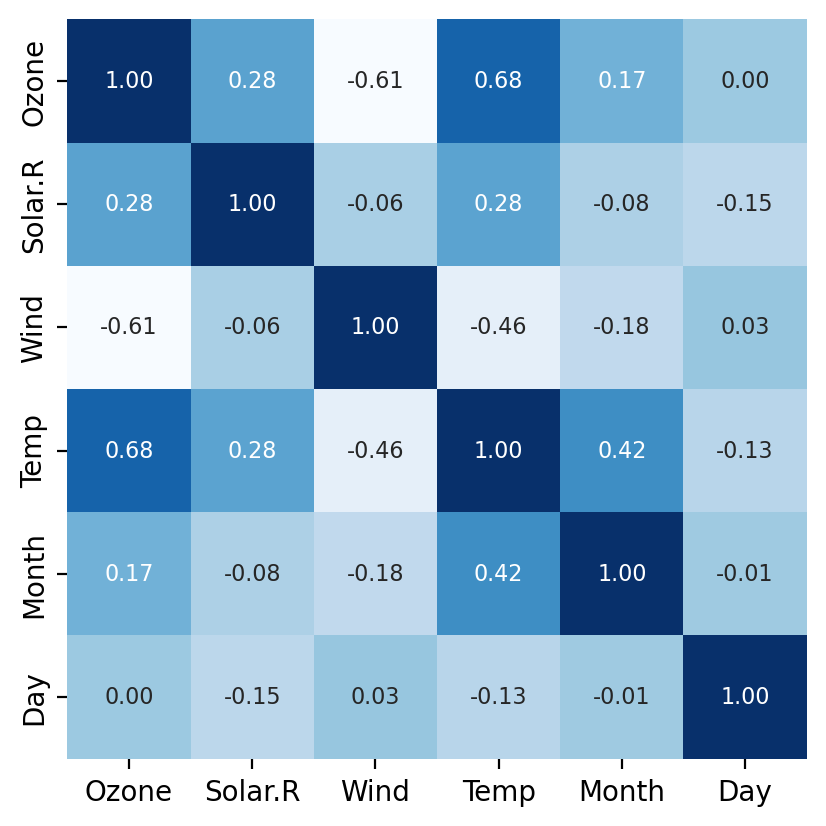

In [59]:
display(data.corr())
sns.heatmap(data.corr(),
           annot = True,
           cmap = 'Blues',
           fmt='.2f',
           cbar=False,
           square=True,
           annot_kws={'size':8})
plt.show()

#### Temp --> Ozone
기온과 오존의 상관관계가 있는지 확인해보기
```
sns.regplot(x='Temp',y='Ozone',data=data)
plt.show()
```

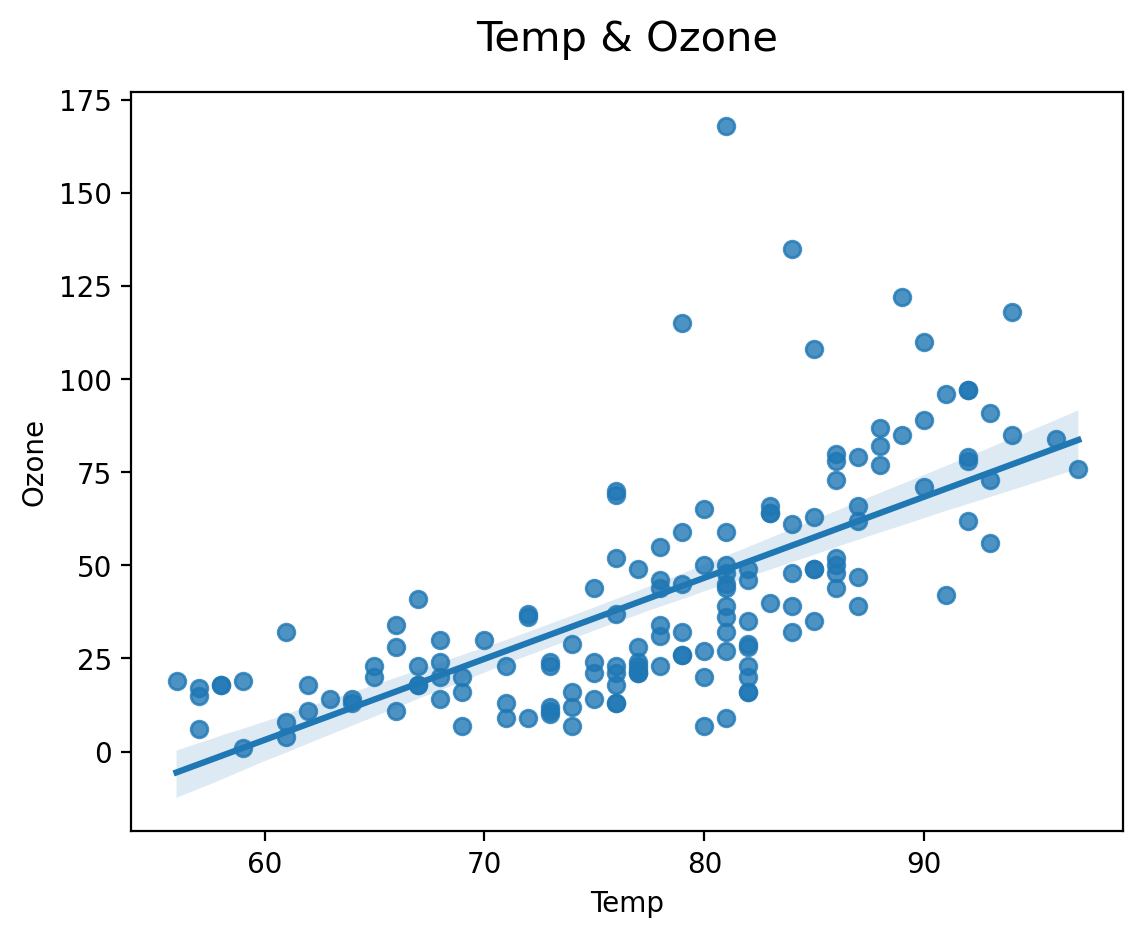

In [60]:
sns.regplot(x='Temp',y='Ozone',data=data)
plt.title("Temp & Ozone", size=15, pad=15)
plt.show()

# 2. 데이터 준비하기
전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비한다.
1. 결측치 처리
2. 변수 제거
3. x, y 분리
4. 학습용 평가용 데이터 분리

#### 1. 결측치 처리
```
data.isna().sum() # 결측치 몇개인지 보기
data.fillna(method='ffill'm inplace=True) # 전날 값으로 결측치 채우기
```

In [61]:
data.isna().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [62]:
# 전날 값으로 결측치 채우기
data.fillna(method='ffill', inplace=True)
data.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

#### 2. 변수 제거
```
    drop_cols=['Month','Day']
    data.drop(drop_cols, axis=1, inplace=True) # drop_cols에 해당하는 열 제거

    data.head()
```

In [63]:
# 변수 제거
drop_cols=['Month','Day']
data.drop(drop_cols, axis=1, inplace=True) # drop_cols에 해당하는 열 제거

data.head()

,Ozone,Solar.R,Wind,Temp
0,41,190.0,7.4,67
1,36,118.0,8.0,72
2,12,149.0,12.6,74
3,18,313.0,11.5,62
4,19,313.0,14.3,56


#### 3. x, y 분리
- target 변수를 명확히 지정한다. : Ozone
- target을 제외한 변수를 x 데이터프레임으로 선언
- y데이터프레임은 target변수만을 가진다

In [68]:
target ='Ozone'

x = data.drop(target, axis=1)
y = data['Ozone']

display(x.head())
display(y.head())

,Solar.R,Wind,Temp
0,190.0,7.4,67
1,118.0,8.0,72
2,149.0,12.6,74
3,313.0,11.5,62
4,313.0,14.3,56


0    41
1    36
2    12
3    18
4    19
Name: Ozone, dtype: int64

#### 4. 학습용, 평가용 데이터 분리
- 학습용, 평가용 데이터를 적절한 비율로 분리한다.
- 반복 실행 시 동일한 결과를 얻기 위해 random_state 옵션을 지정한다.

In [74]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 학습용 : 테스트용을 7:3 비율로 분리한다.
# train_test_split의 경우 데이터를 섞은 후, 분리한다.
# 그렇기 때문에 random_state 설정이 없을 경우 테스트 때마다 결과값이 달라질 수 있다.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [75]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(107, 3)
(46, 3)
(107,)
(46,)


In [76]:
x_train.head()

,Solar.R,Wind,Temp
132,259.0,9.7,73
73,175.0,14.9,81
18,322.0,11.5,68
48,37.0,9.2,65
4,313.0,14.3,56


# 3. 모델링
모델을 **선언**하고, **학습**하고, **평가**하는 과정을 진행한다

0. 문제 구분하기 -> 회귀인지 분류인지
1. 불러오기
2. 선언하기
3. 학습하기
3. 예측하기
4. 평가하기

#### 1. 불러오기
- 알고리즘 : LinearRegression
- 평가 방법 : mean_absolute_error

In [78]:
from sklearn.linear_model import LinearRegression # 선형회귀 알고리즘
from sklearn.metrics import mean_absolute_error # 평균 절대값 오차 

#### 2. 선언하기

In [79]:
model = LinearRegression()

#### 3. 학습하기

In [80]:
model.fit(x_train, y_train)

LinearRegression()

#### 4. 예측하기

In [87]:
y_pred = model.predict(x_test)

print(y_pred[:10]) # 예측값 10개 보기
print(y_test.values[:10]) # 실제값 10개 보기

[13.84003067  5.82919112 81.93563027 58.41267418 50.86150737 31.52971121
 66.8083547  -8.56411529 50.2136544  39.13346172]
[24 18 97 47 34 22 66 18 69 27]


#### 5. 평가하기

In [91]:
print(f"MAE : {mean_absolute_error(y_test, y_pred)}")
# 예측값에서 MAE만큼 오차가 있다는 것을 이야기함

MAE : 13.976843190385708


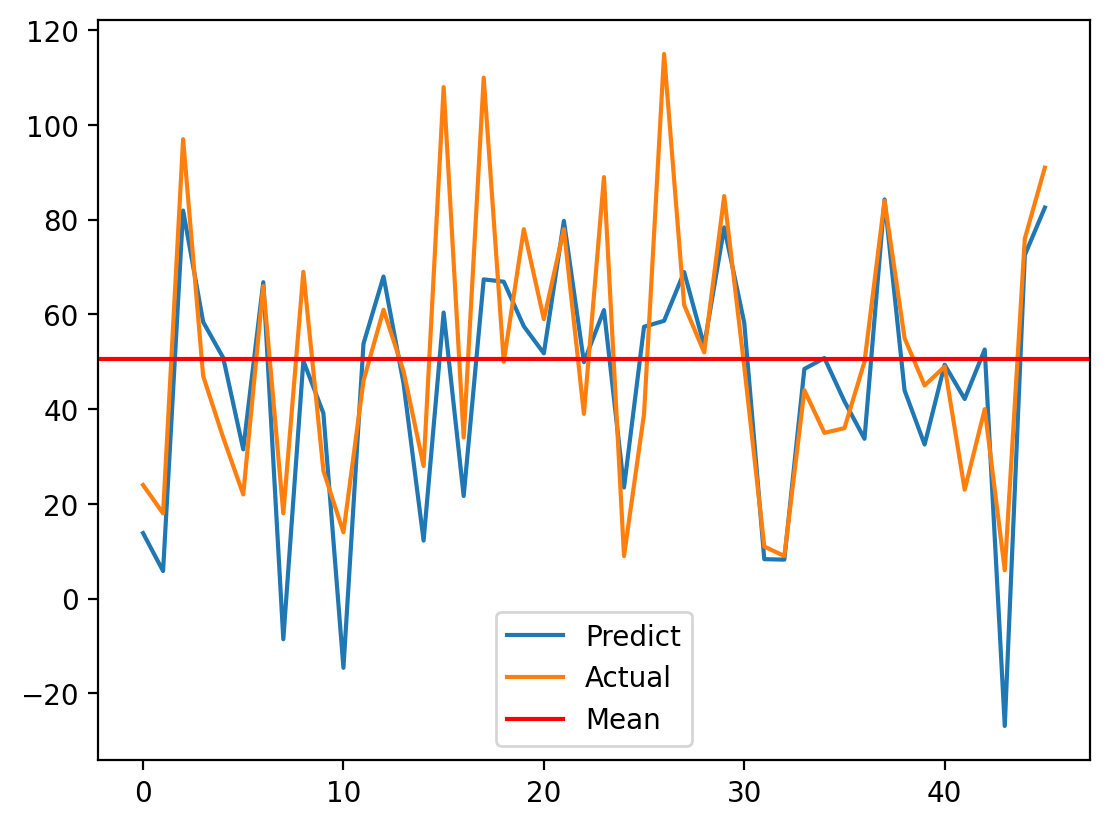

In [103]:
# 평균
mean_ozone = y_test.values.mean()

# 시각화
plt.plot(y_pred, label="Predict") # 예측값
plt.plot(y_test.values, label='Actual') # 실제값
plt.axhline(mean_ozone, color='r',label='Mean')
plt.legend()

plt.show()

In [101]:
mean_ozone = y_test.values.mean()
mean_ozone

50.630434782608695

#### 다양한 성능 지표로 회귀 모델 성능을 평가하기
1. MAE (Mean Absolute Error)
2. MSE (Mean Squared Error)
3. RMSE (Root Mean Squared Error)
4. MAPE (Mean Absolute Percentage Error)
5. R2-Score

**1) MAE(Mean Absolute Error)**


$$\large MAE=\frac{1}{n}\sum_{i=1}^{n}|y_{i}-\hat{y}_{i}|$$

In [114]:
# 모듈 불러오기
from sklearn.metrics import mean_absolute_error

# 성능 평가
print(f"MAE : {mean_absolute_error(y_test, y_pred)}")

MAE : 13.976843190385708


**2) MSE(Mean Squared Error)**

$$\large MSE=\frac{1}{n}\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^2$$

In [115]:
# 모듈 불러오기
from sklearn.metrics import mean_squared_error

# 성능 평가
print(f"MSE : {mean_squared_error(y_test, y_pred)}")

MSE : 341.67887406681893


**3) RMSE(Root Mean Squared Error)**


$$\large RMSE=\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^2}$$

In [116]:
# 모듈 불러오기
from sklearn.metrics import mean_squared_error

# 성능 평가
print(f"RMSE : {(mean_squared_error(y_test, y_pred))**(0.5)}")

RMSE : 18.484557718993955


**4) MAPE(Mean Absolute Percentage Error)**

$$\large MAPE=\frac{1}{n}\sum_{i=1}^{n}\left |\frac{y_{i}-\hat{y}_{i}}{y_{i}}\right |$$

In [117]:
# 모듈 불러오기
from sklearn.metrics import mean_absolute_percentage_error

# 성능 평가
print(f"MAPE : {mean_absolute_percentage_error(y_test, y_pred)}")

MAPE : 0.4718597698848258


**5) R2-Score**

$$\large R^2=1-\frac{SSE}{SST}=1-\frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^2}{\sum_{i=1}^{n}(y_{i}-\bar{y}_{i})^2}$$

In [118]:
# 모듈 불러오기
from sklearn.metrics import r2_score

# 성능 평가
print(f"R2-Score : {r2_score(y_test, y_pred)}")

R2-Score : 0.5744131358040061
